In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
#matplotlib inline

In [3]:
# import the data
df = pd.read_csv('balance.txt', delimiter=',')
df.head(2) 

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


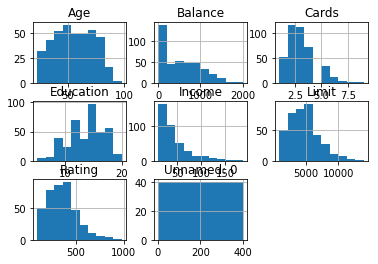

In [24]:
# show any relevant graphs
df.hist();

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,400.0,200.500000,115.614301,1.000,100.75000,200.5000,300.25000,400.000
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


In [7]:
df.corr()['Balance'].sort_values()

Education    -0.008062
Age           0.001835
Unnamed: 0    0.006064
Cards         0.086456
Income        0.463656
Limit         0.861697
Rating        0.863625
Balance       1.000000
Name: Balance, dtype: float64

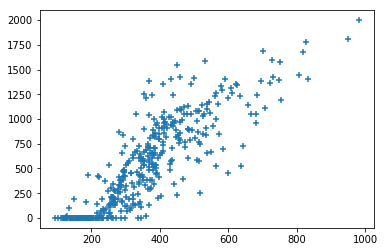

In [25]:
# show any relevant graphs
plt.scatter(df.Rating, df.Balance, marker='+')

In [8]:
# get the "y" vector
y = df.Balance
y.head()

0    333
1    903
2    580
3    964
4    331
Name: Balance, dtype: int64

In [16]:
# get the "X" matrix
X = df.drop(columns=['Balance'])
X = pd.get_dummies(X)

In [17]:
x = sm.add_constant(X)
X.head(3)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,1,0,1,0,0,1,0,0,1
1,2,106.025,6645,483,3,82,15,0,1,0,1,0,1,0,1,0
2,3,104.593,7075,514,4,71,11,1,0,1,0,1,0,0,1,0


In [18]:
# perform linear regression on the training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [19]:
X_train.shape

(268, 17)

In [20]:
X_test.shape

(132, 17)

In [21]:
#get the r-squared value for the testing dataset
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     450.6
Date:                Wed, 18 Jul 2018   Prob (F-statistic):          5.37e-164
Time:                        17:51:21   Log-Likelihood:                -1615.2
No. Observations:                 268   AIC:                             3256.
Df Residuals:                     255   BIC:                             3303.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -93.7521     16.351     -5.734      0.000    -125.952     -61.552
Unnamed: 0                     0.0195      0.058      0.338      0.736      -0.094       0.133
Income                        -7.5929      0.310    -24.465      0.000      -8.204      -6.982
Limit                          0.2216      0.041      5.454      0.000       0.142       0.302
Rating                         0.6277      0.610      1.029      0.304      -0.573       1.829
Cards                         21.3910      5.356      3.994      0.000      10.844      31.938
Age                           -0.5304      0.385     -1.378      0.169      -1.288       0.227
Education                     -0.5830      2.067     -0.282      0.778      -4.653       3.487
Gender_ Male                 -35.4891     10.522     -3.373      0.001     -56.210     -14.769
Gender_Female                -58.2630     10.271     -5.673      0.000     -78.489     -38.037
Student_No                  -255.1080     12.030    -21.205      0.000    -278.799    -231.417
Student_Yes                  161.3559     14.984     10.768      0.000     131.847     190.864
Married_No                   -45.8819     10.324     -4.444      0.000     -66.213     -25.551
Married_Yes                  -47.8702     10.778     -4.442      0.000     -69.095     -26.645
Ethnicity_African American   -42.7295     11.726     -3.644      0.000     -65.823     -19.636
Ethnicity_Asian              -24.4368     11.232     -2.176      0.030     -46.556      -2.318
Ethnicity_Caucasian          -26.5858     10.150     -2.619      0.009     -46.575      -6.597
==============================================================================
Omnibus:                       18.586   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.032
Skew:                           0.686   Prob(JB):                     2.71e-05
Kurtosis:                       3.006   Cond. No.                     9.90e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.83e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
y_hat=results.predict(X_test)
y_hat[:5]

209    772.457011
280    558.077166
33    -125.543453
210    201.978650
93     871.205893
dtype: float64

In [28]:
#get the r-squared value for the testing dataset
r2_score(y_test, y_hat)

0.9522383003309602

Text(0.5,1,'actual vs predicted')

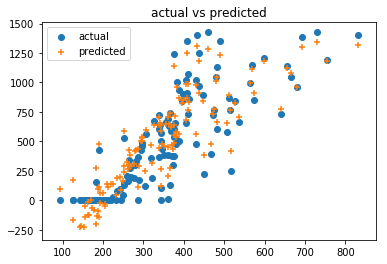

In [30]:
#display the results

plt.scatter(X_test.Rating, y_test, label='actual')
plt.scatter(X_test.Rating, y_hat, label='predicted', marker = '+')
plt.legend()
plt.title('actual vs predicted')